 # Boston House Prices Analysis
 ![Bostonhouse1](img/Bostonhouse1.png)

# Introduction

The Boston Housing dataset was originally created by David Harrison and Daniel Rubfield in 1978 for their paper named "Hedonic Housing prices and the demand for clean air" (1). The paper's main aim was to investigate the methodological issues associated with using the Boston housing market data to measure the consumer's willingness to pay for clean air. The researchers themselves were bullish in how their research compared with other similar papers at the time. They claimed that their dataset was "superior to others" because the researchers created a large number of neighborhood variables and more reliable air pollution data. Following on from this paper the dataset itself was added to the UCI machine learning repository(2). The dataset has been adopted into machine learning and has been used to try and create robust models to predict the Median House Value through the analysis of certain variables in the data. 

The variables created for the project are listed below. Overal there are 14 varibales with 506 entries for each(3). For the purpose of this project I will be analysing the dataset and looking to generate a program capable of predicting the MEDV (Median Value of owner occupied homes) based on some input variables I will provide. I will also aim to find a link between house prices that are in the proximity of the Charles River and those that are not. 

I will run my own anaylysis on the dataset and see if any variables have a close link to the MEDV and if we can predict the MEDV of certin homes using these variables. Below is the list of variables created for the original research project(4).  

## Variables Provided
CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

## Setting up the Dataset

In [1]:
# I am importing the necessary packages to download and analyse this dataset
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline


In [2]:
# I am downloading the boston dataset directly from the sklearn package. 
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston_dataset

# I am printing the keys of the set to understand more of what is in the dataset.  
print(boston_dataset.keys()) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# Converting the data in a dataframe making it more accesible to read and work with.  
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# This dataset that has been downloaded does not have the target variable for the analysis included in its original iteration. 
boston['MEDV'] = boston_dataset.target

In [5]:
# This block of code adds the MEDV column to the dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# This is used to confirm that no data is missing and that all 506 data points are entered. 
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
print(boston.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Data Exploration

From the table above the main findings are that the MEDV of the dataset is 22k dollars for a home in the greater Boston area back in 1978. Counting for inflation that would be worth 89k dollars today (7). The original data set grouped property values to the nearest 10k which is why the max value is capped at 50k, this may hinder our data exploration later. An interesting aspect of the median house price is how much the average home in Boston is now compared to 1978, the median price is now a staggering 596k(8).This appears to be similar increase to the UK where prices have risen for 5k to purchase a home to 140k pounds(9). The RM figures would suggest that properties range from small apartments to two storey houses with the rooms ranging from 3 to 9 on average. 

## Observations Prior to Analysis



Hugh 6:18 PM
@Beccy For the Inferential section you want to compare the House Prices along the Charles River - 'CHAS' variable with those not along the river. So compare both sets of prices using  at-test (box-plots for visualisation too) and try and determine if there is a statistically difference between the house prices for both sets of data

In [8]:
# Generated arrays of x and y to use for t tests. 
x = boston.iloc[:, 3]
y = boston.iloc[:, 13]

In [9]:
## trying to run a t test
import scipy.stats as ss

In [10]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html code to generate the t test
ss.ttest_ind 

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [11]:
#generate the t test and results
ss.ttest_ind(x,y)

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

In [12]:
a = boston ['MEDV']
b = boston ['CHAS']

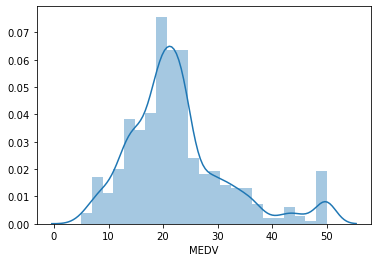

In [13]:
sns.distplot(a);

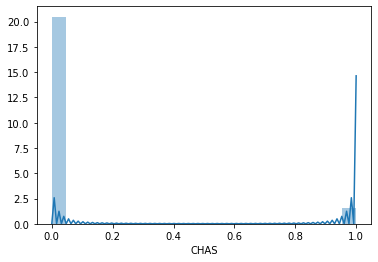

In [14]:
sns.distplot(b);

In [38]:
data=[a,b]
columns= ['MEDV','CHAS']
df = pd.DataFrame(data, columns)
df

Chas0= df[df['CHAS']==0.0]['MEDV']
Chas0

KeyError: 'CHAS'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
plt.title('Charles River Correlation')
x = b
y = a
plt.scatter(a,b)
plt.xlabel('House Prices')
plt.ylabel('Charles River')
plt.show()

# Living on the Charles River

The Charles River is an 80 mile long river that stretches through 23 different towns and cities before meeting the Atlantic Ocean at Boston Harbour(5). The Charles River is a hub of activity and recreation in the Boston area and it is renowned for it's scenic bike rides and rowing regattas. Due to the river's close connection with the city of Boston it would in theory mean that residents would like to live in or around the river for easy access to it's amenities. This theoretical desire to live near the river should result in a direct increase in price driven by this demand. New research carried out in England has actually found a direct link between living in natural enviroments near rivers and lakes and increased happiness in residents(6). This direct link between living near a body of water and happiness would again likely drive up the demand to live near the Charles River. 

In the above graph there is a broad ranges of house prices that do not live near the Charles River. This might indicate that there are various different factors affecting the house prices in the Boston region. However the houses near the river do seem to cluster around the 20-30k dollars indicating a higher median value. Houses on the Charles River minimum value does not drop 15k which again would indicate a link between the river and median house prices.  



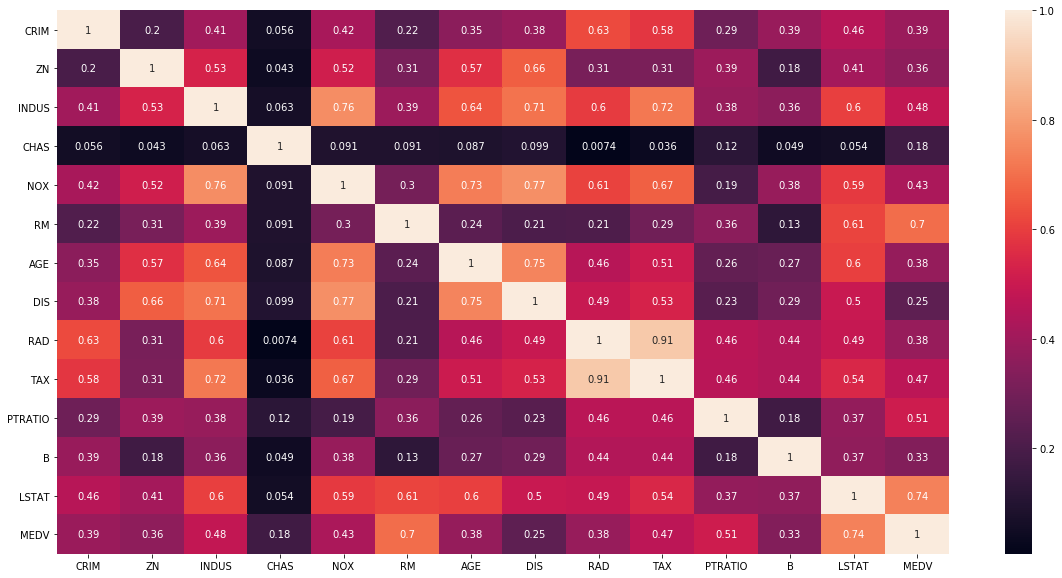

In [17]:

plt.figure(figsize=(20, 10))
sns.heatmap(boston.corr().abs(),  annot=True)

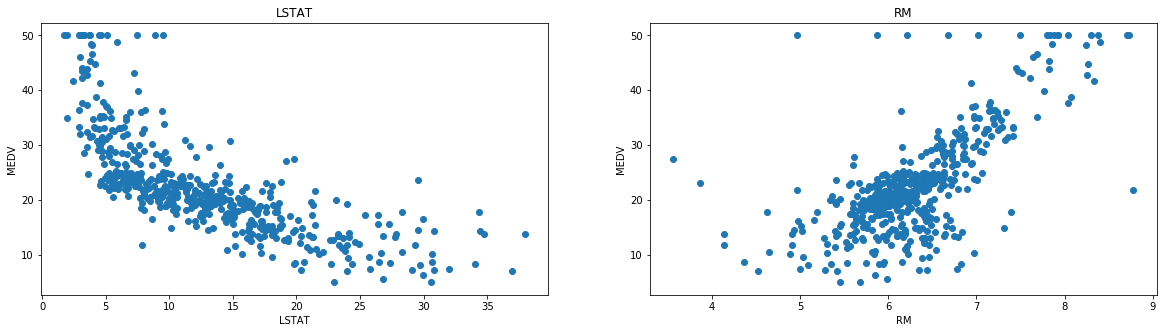

In [16]:
plt.figure(figsize=(20, 5))



features = ['LSTAT', 'RM']

target = boston['MEDV']



for i, col in enumerate(features):

    plt.subplot(1, len(features) , i+1)

    x = boston[col]

    y = target

    plt.scatter(x, y, marker='o')

    plt.title(col)

    plt.xlabel(col)

    plt.ylabel('MEDV')

## References
1. www.hdip-data-analytics.com/_media/resources/pdf/s4/hedonic_housing_prices_and_the_demand_for_clean_air1_.pdf  
2. https://www.kaggle.com/prasadperera/the-boston-housing-dataset 
3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
4. https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef 
5. https://en.wikipedia.org/wiki/Charles_River
6. https://www.sciencedirect.com/science/article/abs/pii/S0959378013000575
7. https://www.dollartimes.com/inflation/inflation.php?amount=10000&year=1978
8. https://www.zillow.com/home-values/ 
9. https://www.theguardian.com/uk/2004/mar/05/health.drugsandalcohol